# Lecture 6c: Neural Network Learning Part 4

3/24/2023

## Using Keras Library:
 
 - Multi Class Classification: 10 Classes

#### Import Libraries:

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.utils.np_utils import to_categorical # Convert Class Vectors to Binary Class Matrices
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

#### Define Functions For Plotting:

In [3]:
# plot training accuracy and loss
def plotCurve(trainingAccuracy, trainingLoss):
    epochs = np.arange(trainingLoss.shape[0])
    #print(epochs)
    plt.figure(figsize = [12, 6])
    plt.subplot(1, 2, 1)
    plt.plot(epochs, trainingAccuracy)
    #plt.axis([-1, 2, -1, 2])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, trainingLoss)
    plt.xlabel('Epoch')
    plt.ylabel('Binary CrossEntropy Loss')
    plt.title('Training Loss')
    plt.show()

# Plot MNIST Images in subplots
def img_plt(img, label):
    plt.figure(figsize=(12, 5.5))
    for i in range (1, 11):
        plt.subplot(2, 5, i)
        plt.imshow(img[i - 1, :, :], cmap = 'gray')
        plt.title('Label: ' + str(label[i - 1]))
    plt.show()

#### Load MNIST Dataset & Split Into Training & Testing Sets:

In [4]:
# Load Data and Split to Training and Testing Sets:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#print(x_train.shape) # (60000, 28, 28)
#print(y_train.shape) # (60000,)
#print(x_test.shape) # (10000, 28, 28)
#print(y_test.shape) # (10000,)

print('The number of Training Images =', x_train.shape[0])
print('The number of Training Labels =', y_train.shape[0])
print('The size of each Training Image is:', x_train.shape[1], 'by', x_train.shape[2], 'pixels \n')
print('The number of Testing Images =', x_test.shape[0])
print('The number of Testing Labels =', y_test.shape[0])
print('The size of each Testing Image is:', x_test.shape[1], 'by', x_test.shape[2], 'pixels')

The number of Training Images = 60000
The number of Training Labels = 60000
The size of each Training Image is: 28 by 28 pixels 

The number of Testing Images = 10000
The number of Testing Labels = 10000
The size of each Testing Image is: 28 by 28 pixels


#### Plot Digits 0 - 9 From The Training Set:

 - For Each Digit, Select A Random Sample.

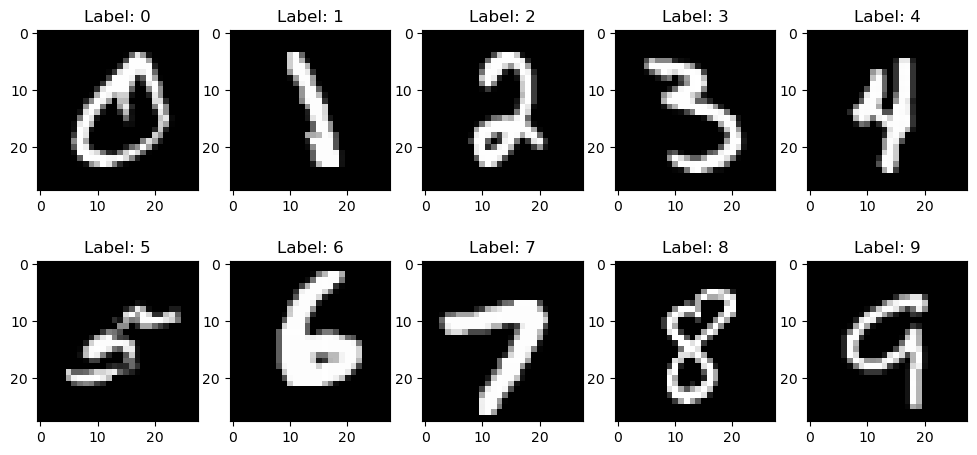

In [5]:
# Select 10 images from the training set
x_train_rnd = np.zeros((10, 28, 28))
y_train_rnd = np.arange(10)

for digit in range(10): # finds 10 images from the set
    x_train_d = x_train[y_train == digit,:,:]
    #x_train_rnd[digit,:,:] = x_train_d[0,:,:] # Select FIRST Digits From Set
    x_train_rnd[digit,:,:] = x_train_d[randint(0, x_train_d.shape[0]),:,:] # Select RANDOM Digits From Set

img_plt(x_train_rnd, y_train_rnd) # plot the images

#### Divide Training Set Into Training and Validation Sets

 - Create Shuffled Array Indices.
 - Shuffle Training and Testing Data.
 - Pull 1st 500 Images from Training Set and Designate as Validation Set.
    - The Remainder Of The Training Set is the New Training Set.

In [6]:
# create array with 60000 indices for TRAINING:
train_indices = np.arange(0, x_train.shape[0])
#print(train_indices)

# create array with 10000 indices for TESTING:
test_indices = np.arange(0, x_test.shape[0])
#print(test_indices, '\n')

# shuffle the indices of the training array
shuffled_indices_train = np.random.permutation(train_indices)
#print(shuffled_indices_train)

# shuffle the indices of the testing array
shuffled_indices_test = np.random.permutation(test_indices)
#print(shuffled_indices_test, '\n')

# create arrays of SHUFFLED TRAINING data
x_shuffled_all_train = x_train[shuffled_indices_train,:,:]
y_shuffled_all_train = y_train[shuffled_indices_train]
#print(x_shuffled_all_train.shape)
#print(y_shuffled_all_train.shape, '\n')

# create arrays of SHUFFLED TESTING data
x_shuffled_all_test = x_test[shuffled_indices_test,:,:]
y_shuffled_all_test = y_test[shuffled_indices_test]
#print(x_shuffled_all_test.shape)
#print(y_shuffled_all_test.shape, '\n')

# create validation set of 500 random images FROM SHUFFLED training set
x_valid_09 = x_shuffled_all_train[0:500,:,:]
y_valid_09 = y_shuffled_all_train[0:500]
print(x_valid_09.shape)
print(y_valid_09.shape, '\n')

# pull the rest of the images FROM SHUFFLED training set
x_train_09 = x_shuffled_all_train[500:,:,:]
y_train_09 = y_shuffled_all_train[500:]
print(x_train_09.shape)
print(y_train_09.shape, '\n')

# SHUFFLE the TESTING Set
x_test_09 = x_shuffled_all_test[:]
y_test_09 = y_shuffled_all_test[:]
print(x_test_09.shape)
print(y_test_09.shape)

(500, 28, 28)
(500,) 

(59500, 28, 28)
(59500,) 

(10000, 28, 28)
(10000,)


#### Check Number Of Images In Training, Testing and Validation Sets:

In [7]:
print(f'The number of images in \'x_train_09\' Training Set = {x_train_09.shape[0]}')
print(f'The number of labels in \'y_train_09\' Training Set = {y_train_09.shape[0]}\n')

print(f'The number of images in \'x_valid_09\' Validation Set = {x_valid_09.shape[0]}')
print(f'The number of labels in \'y_valid_09\' Validation Set = {y_valid_09.shape[0]}\n')

print(f'The number of images in \'x_test_09\' Testing Set = {x_test_09.shape[0]}')
print(f'The number of labels in \'y_test_09\' Testing Set = {y_test_09.shape[0]}')

The number of images in 'x_train_09' Training Set = 59500
The number of labels in 'y_train_09' Training Set = 59500

The number of images in 'x_valid_09' Validation Set = 500
The number of labels in 'y_valid_09' Validation Set = 500

The number of images in 'x_test_09' Testing Set = 10000
The number of labels in 'y_test_09' Testing Set = 10000


#### Plot 10 Images From The Training, Testing and Validation Set:

 - These images are now randomized

First 10 Randomized Images From Training Set:



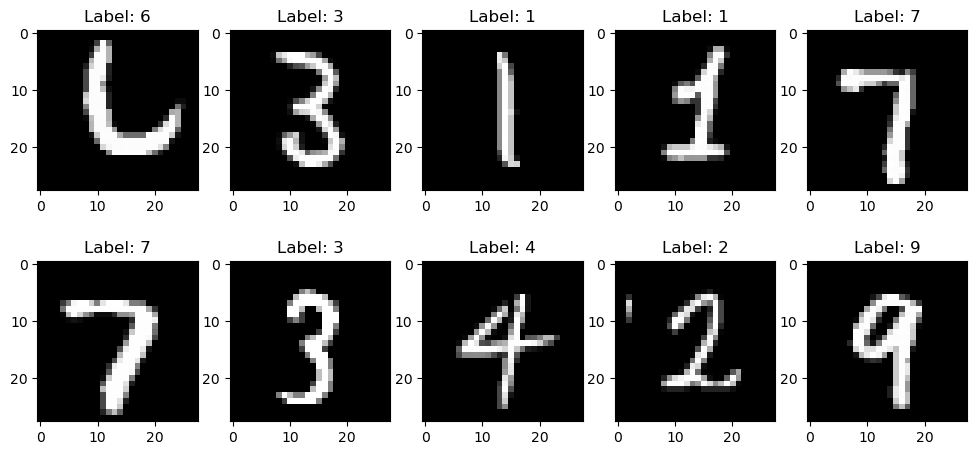

First 10 Randomized Images From Testing Set:



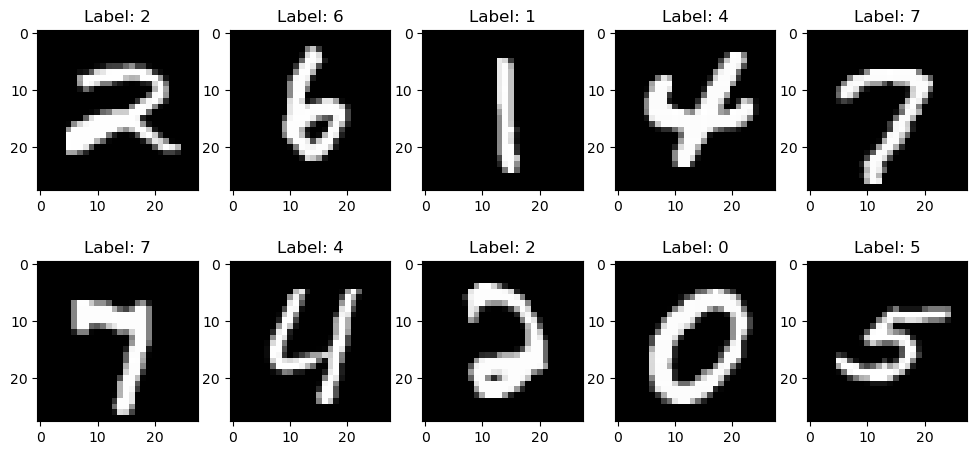

First 10 Randomized Images From Validation Set:



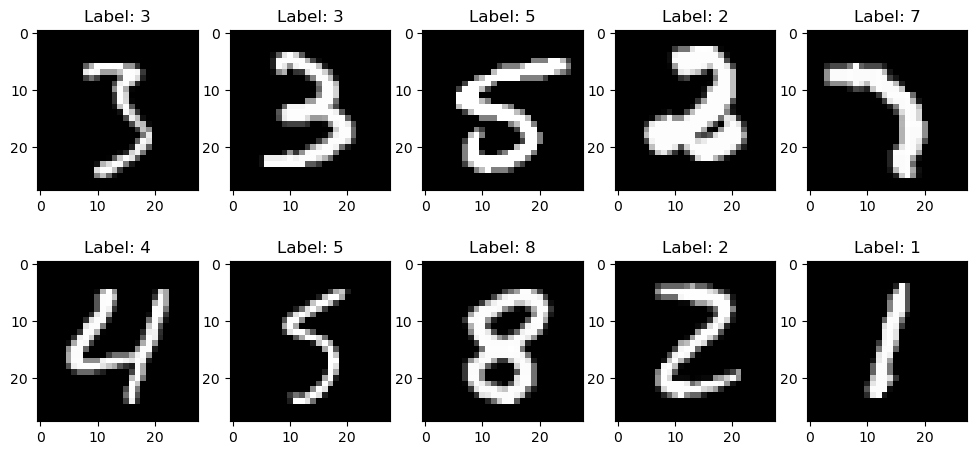

In [8]:
print('First 10 Randomized Images From Training Set:\n')
img_plt(x_train_09[0:10,:,:], y_train_09[0:10]) # Select First 10 images from the set

print('First 10 Randomized Images From Testing Set:\n')
img_plt(x_test_09[0:10,:,:], y_test_09[0:10]) # Select First 10 images from the set

print('First 10 Randomized Images From Validation Set:\n')
img_plt(x_valid_09[0:10,:,:], y_valid_09[0:10]) # Select First 10 images from the set

### Select MNIST Digits 0 - 9:

 - Each individual MNIST image is $ 28 \times 28 $ pixels

#### Create 10 Classes for Digits 0 - 9:

In [9]:
classes2 = np.arange(10)
print(classes2)

[0 1 2 3 4 5 6 7 8 9]


#### Flatten The Images:

 - This takes the $ 28 \times 28 $ 2-D image and makes it into a 784 index 1-D vector

In [10]:
x_train_flat = np.reshape(x_train_09, (x_train_09.shape[0], x_train_09.shape[1] * x_train_09.shape[2]))
x_valid_flat = np.reshape(x_valid_09, (x_valid_09.shape[0], x_valid_09.shape[1] * x_valid_09.shape[2]))
x_test_flat = np.reshape(x_test_09, (x_test_09.shape[0], x_test_09.shape[1] * x_test_09.shape[2]))

print(x_train_flat.shape)
print(x_valid_flat.shape)
print(x_test_flat.shape)

(59500, 784)
(500, 784)
(10000, 784)


#### Scaling Each Pixel Value In The Range $ [0, 1] $:

 - Each original image contains pixel values $ [0, 255] $
 - Calculate min and max of each feature based on the training set.
 - Scale each feature in all sets:

 ##### $$ X_{scaled} = \frac{X - X_{min}}{X_{max} - {X_{min}}} $$

In [11]:
x_train_flat = x_train_flat.astype('float32')
x_train_flat /= 255

x_valid_flat = x_valid_flat.astype('float32')
x_valid_flat /= 255

x_test_flat = x_test_flat.astype('float32')
x_test_flat /= 255

#### Normalizing The Features:

 - Alternative to Scaling using `sklearn.preprocessing.StandardScaler()`

 ##### $$ X_{norm} = \frac{X - \mathrm{\mu}}{\sigma} $$

In [12]:
scaler = StandardScaler()
x_train_flat2 = scaler.fit_transform(x_train_flat)
x_valid_flat2 = scaler.transform(x_valid_flat)
x_test_flat2 = scaler.transform(x_test_flat)

#### Define Model For 10 Classes:

In [14]:
model3 = Sequential()
model3.add(Dense(input_dim = x_train_flat.shape[1], units=512, activation='tanh')) # Hidden Layer 1
model3.add(Dense(units=512, activation='tanh')) # Hidden Layer 2
model3.add(Dense(units=len(classes2), activation='softmax')) # Output Layer (10 classes = 10 neurons)
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


#### Compile, Fit & Evaluate Model:

Epoch 1/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.8820 - accuracy: 0.7883
Epoch 2/50
3719/3719 [==============================] - 6s 2ms/step - loss: 0.4571 - accuracy: 0.8785
Epoch 3/50
3719/3719 [==============================] - 6s 2ms/step - loss: 0.3877 - accuracy: 0.8923
Epoch 4/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.3550 - accuracy: 0.8995
Epoch 5/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.3348 - accuracy: 0.9044
Epoch 6/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.3206 - accuracy: 0.9086
Epoch 7/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.3097 - accuracy: 0.9118
Epoch 8/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.3008 - accuracy: 0.9141
Epoch 9/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.2931 - accuracy: 0.9164
Epoch 10/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.286

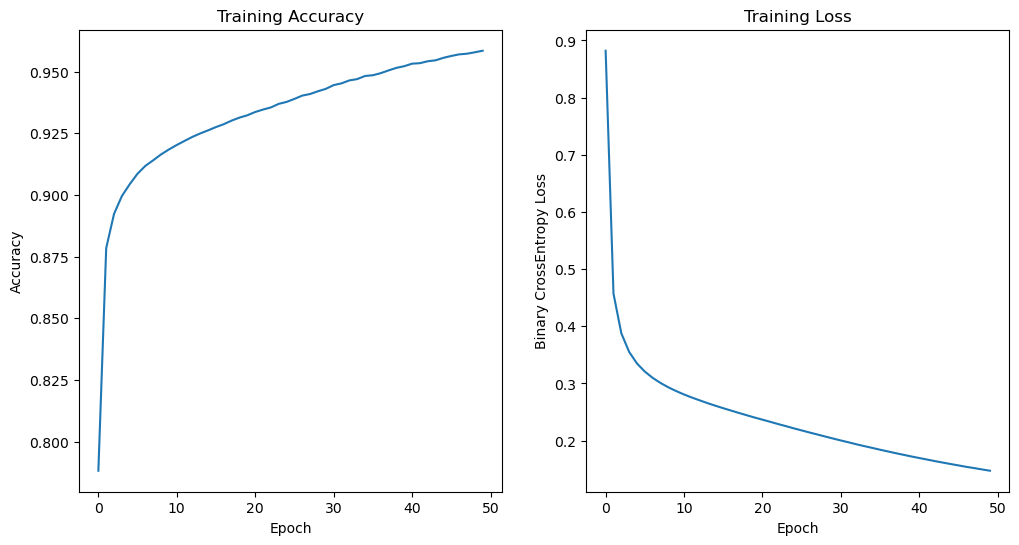

In [15]:
opt3 = tf.keras.optimizers.SGD(learning_rate=0.001)
model3.compile(loss='categorical_crossentropy', optimizer=opt3, metrics=['accuracy'])

# Convert Class Vectors To Binary Class Matrices:
y_train_c = to_categorical(y_train_09, len(classes2))
y_valid_c = to_categorical(y_valid_09, len(classes2))
y_test_c = to_categorical(y_test_09, len(classes2))

history3 = model3.fit(x_train_flat, y_train_c, batch_size=16, epochs=50, verbose=1)

scoreValid3 = model3.evaluate(x_valid_flat, y_valid_c)
print(f'\nTotal Loss On Validation Set: {scoreValid3[0]}\n')
print(f'Accuracy Of Validation Set: {scoreValid3[1]}\n')

accuracyCurve3 = np.array(history3.history['accuracy'])
lossCurve3 = np.array(history3.history['loss'])
plotCurve(accuracyCurve3, lossCurve3)

#### Predict Classes Of Held Out Samples:

In [16]:
testClass3Prob = model3.predict(x_test_flat)
testLabels3 = np.argmax(testClass3Prob, axis = 1)

testAccuracy3 = (accuracy_score(testLabels3, y_test_09) * 100)
print(f'\nThe Accuracy Using The Testing Set Is: {testAccuracy3} %\n')

confusionMatrix3 = confusion_matrix(testLabels3, y_test_09)
#print(f'The Confusion Matrix Using Testing Set Is:\n\n{confusionMatrix3}')

colLabels = ['Pred 0\'s', 'Pred 1\'s', 'Pred 2\'s', 'Pred 3\'s', 'Pred 4\'s',
             'Pred 5\'s', 'Pred 6\'s', 'Pred 7\'s', 'Pred 8\'s', 'Pred 9\'s']
rowLabels = ['Act 0\'s', 'Act 1\'s', 'Act 2\'s', 'Act 3\'s', 'Act 4\'s',
             'Act 5\'s', 'Act 6\'s', 'Act 7\'s', 'Act 8\'s', 'Act 9\'s']

fancyMatrix3 = pd.DataFrame(confusionMatrix3, columns=colLabels, index=rowLabels,)

print('\nThe Confusion Matrix Using Testing Set Is:\n')

display(fancyMatrix3)

313/313 [==============================] - 0s 1ms/step

The Accuracy Using The Testing Set Is: 95.45 %


The Confusion Matrix Using Testing Set Is:



,Pred 0's,Pred 1's,Pred 2's,Pred 3's,Pred 4's,Pred 5's,Pred 6's,Pred 7's,Pred 8's,Pred 9's
Act 0's,966,0,6,0,1,9,11,2,3,6
Act 1's,0,1118,2,0,1,2,3,6,4,6
Act 2's,1,3,981,9,6,0,4,18,4,2
Act 3's,2,2,6,966,2,14,1,5,16,12
Act 4's,0,0,5,0,933,4,5,5,6,25
Act 5's,4,1,1,8,0,836,9,1,8,5
Act 6's,4,3,10,1,6,9,921,0,7,1
Act 7's,1,2,7,10,4,4,1,974,9,13
Act 8's,2,6,12,13,3,9,3,2,914,3
Act 9's,0,0,2,3,26,5,0,15,3,936


#### Define Another Model To Demonstrate Checkpoints:

In [17]:
model4 = Sequential()
model4.add(Dense(input_dim = x_train_flat.shape[1], units=512, activation='tanh')) # Hidden Layer 1
model4.add(Dense(units=512, activation='tanh')) # Hidden Layer 2
model4.add(Dense(units=len(classes2), activation='softmax')) # Output Layer (10 classes = 10 neurons)
model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


#### Complile, Fit & Evaluate Saving The Best Model Using Training & Validation Data:

 - Create a checkpoint to save the best model based on the lowest validation loss.
 - Send the validation set to the `fit()` function.
 - Load the best model during testing

Epoch 1/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.8931 - accuracy: 0.7880 - val_loss: 0.5295 - val_accuracy: 0.8720
Epoch 2/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.4616 - accuracy: 0.8773 - val_loss: 0.4249 - val_accuracy: 0.8820
Epoch 3/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.3911 - accuracy: 0.8919 - val_loss: 0.3871 - val_accuracy: 0.8860
Epoch 4/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.3579 - accuracy: 0.8994 - val_loss: 0.3686 - val_accuracy: 0.8900
Epoch 5/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.3375 - accuracy: 0.9042 - val_loss: 0.3529 - val_accuracy: 0.9020
Epoch 6/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.3231 - accuracy: 0.9082 - val_loss: 0.3363 - val_accuracy: 0.9060
Epoch 7/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.3119 - accuracy: 0.9113 - val_loss: 0.3305 - val_accuracy:

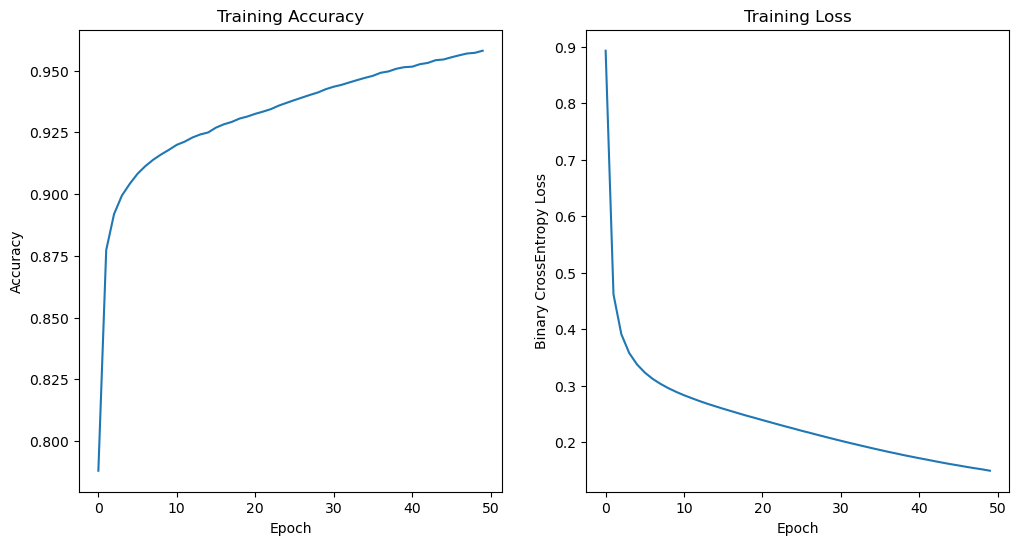

In [18]:
savePath = '../assets/Lecture6/model4_mnist.h5'
callbackSave = ModelCheckpoint(savePath, monitor='val_loss', verbose=0, save_best_only=True, save_freq='epoch')

opt4 = tf.keras.optimizers.SGD(learning_rate=0.001)
model4.compile(loss='categorical_crossentropy', optimizer=opt4, metrics=['accuracy'])

history4 = model4.fit(x_train_flat, y_train_c, batch_size=16, epochs=50, 
            verbose=1, validation_data=(x_valid_flat, y_valid_c), callbacks=[callbackSave])

model4 = load_model(savePath)

scoreValid4 = model4.evaluate(x_valid_flat, y_valid_c)
print(f'\nTotal Loss On Validation Set: {scoreValid4[0]}\n')
print(f'Accuracy Of Validation Set: {scoreValid4[1]}\n')

accuracyCurve4 = np.array(history4.history['accuracy'])
lossCurve4 = np.array(history4.history['loss'])
plotCurve(accuracyCurve4, lossCurve4)

#### Evaluate The Model On The Test Data:

In [19]:
testClass4Prob = model4.predict(x_test_flat)
testLabels4 = np.argmax(testClass4Prob, axis=1)

testAccuracy4 = (accuracy_score(testLabels4, y_test_09) * 100)
print(f'\nThe Accuracy Using The Testing Set = {testAccuracy4} %')

confusionMatrix4 = confusion_matrix(testLabels4, y_test_09)
# print(f'The Confusion Matrix Using Testing Set Is:\n\n{confusionMatrix4}')

fancyMatrix4 = pd.DataFrame(confusionMatrix4, columns=colLabels, index=rowLabels,)

print('\nThe Confusion Matrix Using Testing Set Is:\n')

display(fancyMatrix4)

313/313 [==============================] - 0s 1ms/step

The Accuracy Using The Testing Set = 95.37 %

The Confusion Matrix Using Testing Set Is:



,Pred 0's,Pred 1's,Pred 2's,Pred 3's,Pred 4's,Pred 5's,Pred 6's,Pred 7's,Pred 8's,Pred 9's
Act 0's,964,0,7,0,1,10,10,2,4,7
Act 1's,0,1121,3,1,1,2,3,7,4,7
Act 2's,1,3,976,9,7,2,3,20,3,1
Act 3's,3,1,8,968,1,19,1,5,16,9
Act 4's,0,0,5,0,933,5,6,4,7,21
Act 5's,4,1,1,9,0,829,12,1,8,4
Act 6's,5,3,10,0,6,9,917,0,6,1
Act 7's,1,2,6,11,3,1,2,969,7,12
Act 8's,2,4,14,8,2,10,4,2,918,5
Act 9's,0,0,2,4,28,5,0,18,1,942
